Follows: http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

# Data

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1]

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
print(trainset.train_data.shape)
print(trainset.train_labels)

(50000, 32, 32, 3)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6,

In [4]:
print(trainset.train_list)

[['data_batch_1', 'c99cafc152244af753f735de768cd75f'], ['data_batch_2', 'd4bba439e000b95fd0a9bffe97cbabec'], ['data_batch_3', '54ebc095f3ab1f0389bbae665268c751'], ['data_batch_4', '634d18415352ddfa80567beed471001a'], ['data_batch_5', '482c414d41f54cd18b22e5b47cb7c3cb']]


Visualising some training images:

truck  deer   cat plane


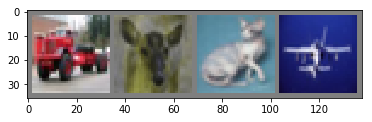

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
%matplotlib inline
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
print(type(images))
print(images.size())
print(type(labels))
print(labels.size())

<class 'torch.FloatTensor'>
torch.Size([4, 3, 32, 32])
<class 'torch.LongTensor'>
torch.Size([4])


In [7]:
print("labels:")
print(labels)
print("images:")
print(images)

labels:

 9
 4
 3
 0
[torch.LongTensor of size 4]

images:

(0 ,0 ,.,.) = 
  0.1451  0.1608  0.1686  ...  -0.0902 -0.2627 -0.4902
  0.2549  0.2314  0.2078  ...  -0.1373 -0.2784 -0.6000
  0.2392  0.2784  0.2784  ...  -0.4196 -0.4353 -0.5843
           ...             ⋱             ...          
  0.4353  0.4353  0.4588  ...   0.4745  0.4745  0.4824
  0.5373  0.5294  0.5216  ...   0.4275  0.4431  0.4353
  0.6000  0.6078  0.6078  ...   0.5294  0.5373  0.5294

(0 ,1 ,.,.) = 
  0.0196  0.0745  0.1294  ...   0.0275 -0.1373 -0.3647
  0.0745  0.0667  0.0588  ...  -0.0118 -0.1529 -0.4745
 -0.0039  0.0353  0.0275  ...  -0.2941 -0.3098 -0.4667
           ...             ⋱             ...          
  0.4275  0.4275  0.4510  ...   0.4510  0.4588  0.4667
  0.5294  0.5216  0.5137  ...   0.4118  0.4275  0.4196
  0.5922  0.6000  0.6000  ...   0.5216  0.5294  0.5216

(0 ,2 ,.,.) = 
 -0.0196  0.0510  0.1294  ...   0.0510 -0.1373 -0.4353
 -0.0118  0.0039  0.0196  ...  -0.0039 -0.1686 -0.5373
 -0.1294 -0.0

# Network/Training configuration

Create CNN:

In [8]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [9]:
net.cuda()  # transfer the neural net onto the GPU ("had remove/reinstall nvidia drivers following wiki instructions on nvidia-docker aws")

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

Classification Cross-Entropy loss and SGD with momentum:

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training

In [11]:
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable (for automatic differentiation, and thus automatic backwards pass)
        #inputs, labels = Variable(inputs), Variable(labels)
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())  # transfer the inputs/targets onto the GPU

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable weights
        # of the model)
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.194
[1,  4000] loss: 1.829
[1,  6000] loss: 1.688
[1,  8000] loss: 1.576
[1, 10000] loss: 1.507
[1, 12000] loss: 1.462
Finished Training


In [12]:
print outputs
print outputs.size() # note batch_size=4 and 10 classes

print "\n"
print loss

Variable containing:
 0.3293 -0.9149  0.2520 -0.1748  0.8999 -0.0667 -0.8854  1.7241 -1.3604 -0.5929
 0.7675  6.0524 -0.3100 -1.6552 -2.8158 -2.2440 -3.4857 -0.9085  0.8922  4.0346
 2.2292 -0.4770  0.7237 -1.1600 -0.1931 -1.9539 -2.7980  0.0461  2.6671  0.3563
-2.3142 -4.4803  1.5798  2.9912  0.7146  3.8544  0.6446  1.2021 -2.1509 -2.0506
[torch.cuda.FloatTensor of size 4x10 (GPU 0)]

torch.Size([4, 10])


Variable containing:
 1.5599
[torch.cuda.FloatTensor of size 1 (GPU 0)]



# Testing

Ground truth:

('GroundTruth: ', '  cat  ship  ship plane')


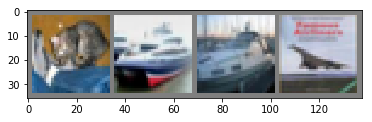

In [13]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


Predictions:

In [14]:
#outputs = net(Variable(images))
outputs = net(Variable(images.cuda())) # transfer the inputs/targets onto the GPU

In [15]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j][0]]
                              for j in range(4)))

('Predicted: ', '  cat   car   car  ship')


Testing on the whole dataset:

In [16]:
#from IPython.core.debugger import Tracer

correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))  # transfer the images onto the GPU
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
   # Tracer()() #this one triggers the debugger
    correct += (predicted == labels.cuda()).sum()  # transfer the labels onto the GPU

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 47 %


Note random guessing = 10% (as 10 classes).

Lets see what are the classes that performed well, and the classes that did not perform well:

In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))   # transfer the images onto the GPU
    _, predicted = torch.max(outputs.data, 1)
    #c = (predicted == labels).squeeze()
    c = (predicted == labels.cuda()).squeeze()  # transfer the labels onto the GPU
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 47 %
Accuracy of   car : 51 %
Accuracy of  bird : 36 %
Accuracy of   cat : 19 %
Accuracy of  deer : 25 %
Accuracy of   dog : 59 %
Accuracy of  frog : 49 %
Accuracy of horse : 70 %
Accuracy of  ship : 45 %
Accuracy of truck : 65 %
